In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split

In [4]:
# importing  dataset
df = pd.read_csv("Material.csv")
df

,Material Quantity (gm),Additive Catalyst (gm),Ash Component (gm),Water Mix (ml),Plasticizer (gm),Moderate Aggregator,Refined Aggregator,Formulation Duration (hrs),Compression Strength MPa
0,486.42,180.60,21.26,201.66,16.11,1151.17,708.50,344.43,79.89
1,133.32,260.14,185.60,175.99,6.27,1090.57,1010.25,28.86,59.80
2,559.97,2.84,111.76,295.23,11.95,1024.93,810.69,237.68,77.86
3,391.43,351.05,76.39,299.14,19.00,1134.88,881.34,208.81,71.74
4,394.78,352.61,194.35,235.54,17.02,1098.24,781.01,266.84,76.07
...,...,...,...,...,...,...,...,...,...
6134,188.78,162.30,142.65,163.66,15.98,1003.82,1002.47,357.91,50.61
6135,349.87,291.45,77.82,188.26,25.82,925.10,1005.31,104.20,54.24
6136,358.29,22.70,17.99,208.58,34.91,1081.07,792.44,302.76,56.57
6137,445.25,275.59,178.86,191.77,18.07,865.15,833.10,374.63,58.21


In [5]:
# dataset details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6139 entries, 0 to 6138
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Material Quantity (gm)      6030 non-null   float64
 1   Additive Catalyst (gm)      6030 non-null   float64
 2   Ash Component (gm)          6030 non-null   float64
 3   Water Mix (ml)              6030 non-null   float64
 4   Plasticizer (gm)            6030 non-null   float64
 5   Moderate Aggregator         6030 non-null   float64
 6   Refined Aggregator          6030 non-null   float64
 7   Formulation Duration (hrs)  6030 non-null   float64
 8   Compression Strength MPa    6139 non-null   float64
dtypes: float64(9)
memory usage: 431.8 KB


In [6]:
# handling null values
df.isnull().sum()

Material Quantity (gm)        109
Additive Catalyst (gm)        109
Ash Component (gm)            109
Water Mix (ml)                109
Plasticizer (gm)              109
Moderate Aggregator           109
Refined Aggregator            109
Formulation Duration (hrs)    109
Compression Strength MPa        0
dtype: int64

In [7]:
# null values are 1.8% of the total dataset
# droping null vales

df = df.dropna()

In [8]:
# checking no unique values present
df.nunique()

Material Quantity (gm)        5016
Additive Catalyst (gm)        4865
Ash Component (gm)            4665
Water Mix (ml)                4398
Plasticizer (gm)              2872
Moderate Aggregator           4916
Refined Aggregator            4978
Formulation Duration (hrs)    4676
Compression Strength MPa      3576
dtype: int64

In [9]:
# dealing with duplicate values

df.duplicated().sum()

25

In [10]:
# drop duplicates

df.drop_duplicates(inplace = True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6652\3729517983.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)


In [11]:
# discribtion of columns
df.describe()

,Material Quantity (gm),Additive Catalyst (gm),Ash Component (gm),Water Mix (ml),Plasticizer (gm),Moderate Aggregator,Refined Aggregator,Formulation Duration (hrs),Compression Strength MPa
count,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000
mean,383.293494,196.765204,112.321932,224.412276,17.658058,998.922931,811.755910,174.913577,56.745674
std,150.175076,133.544364,74.043089,41.589582,11.708399,97.775814,112.963436,112.356048,16.145098
min,124.440000,0.000000,0.000000,148.600000,0.000000,821.540000,609.230000,16.250000,2.610000
25%,255.420000,77.820000,45.610000,190.600000,7.870000,918.530000,716.920000,71.000000,46.960000
50%,376.820000,192.180000,115.540000,225.700000,16.380000,998.600000,810.430000,164.030000,59.700000
75%,511.200000,308.470000,174.420000,257.630000,27.720000,1080.070000,905.540000,273.260000,69.760000
max,658.800000,438.470000,244.120000,301.340000,39.280000,1174.360000,1018.050000,380.250000,92.510000


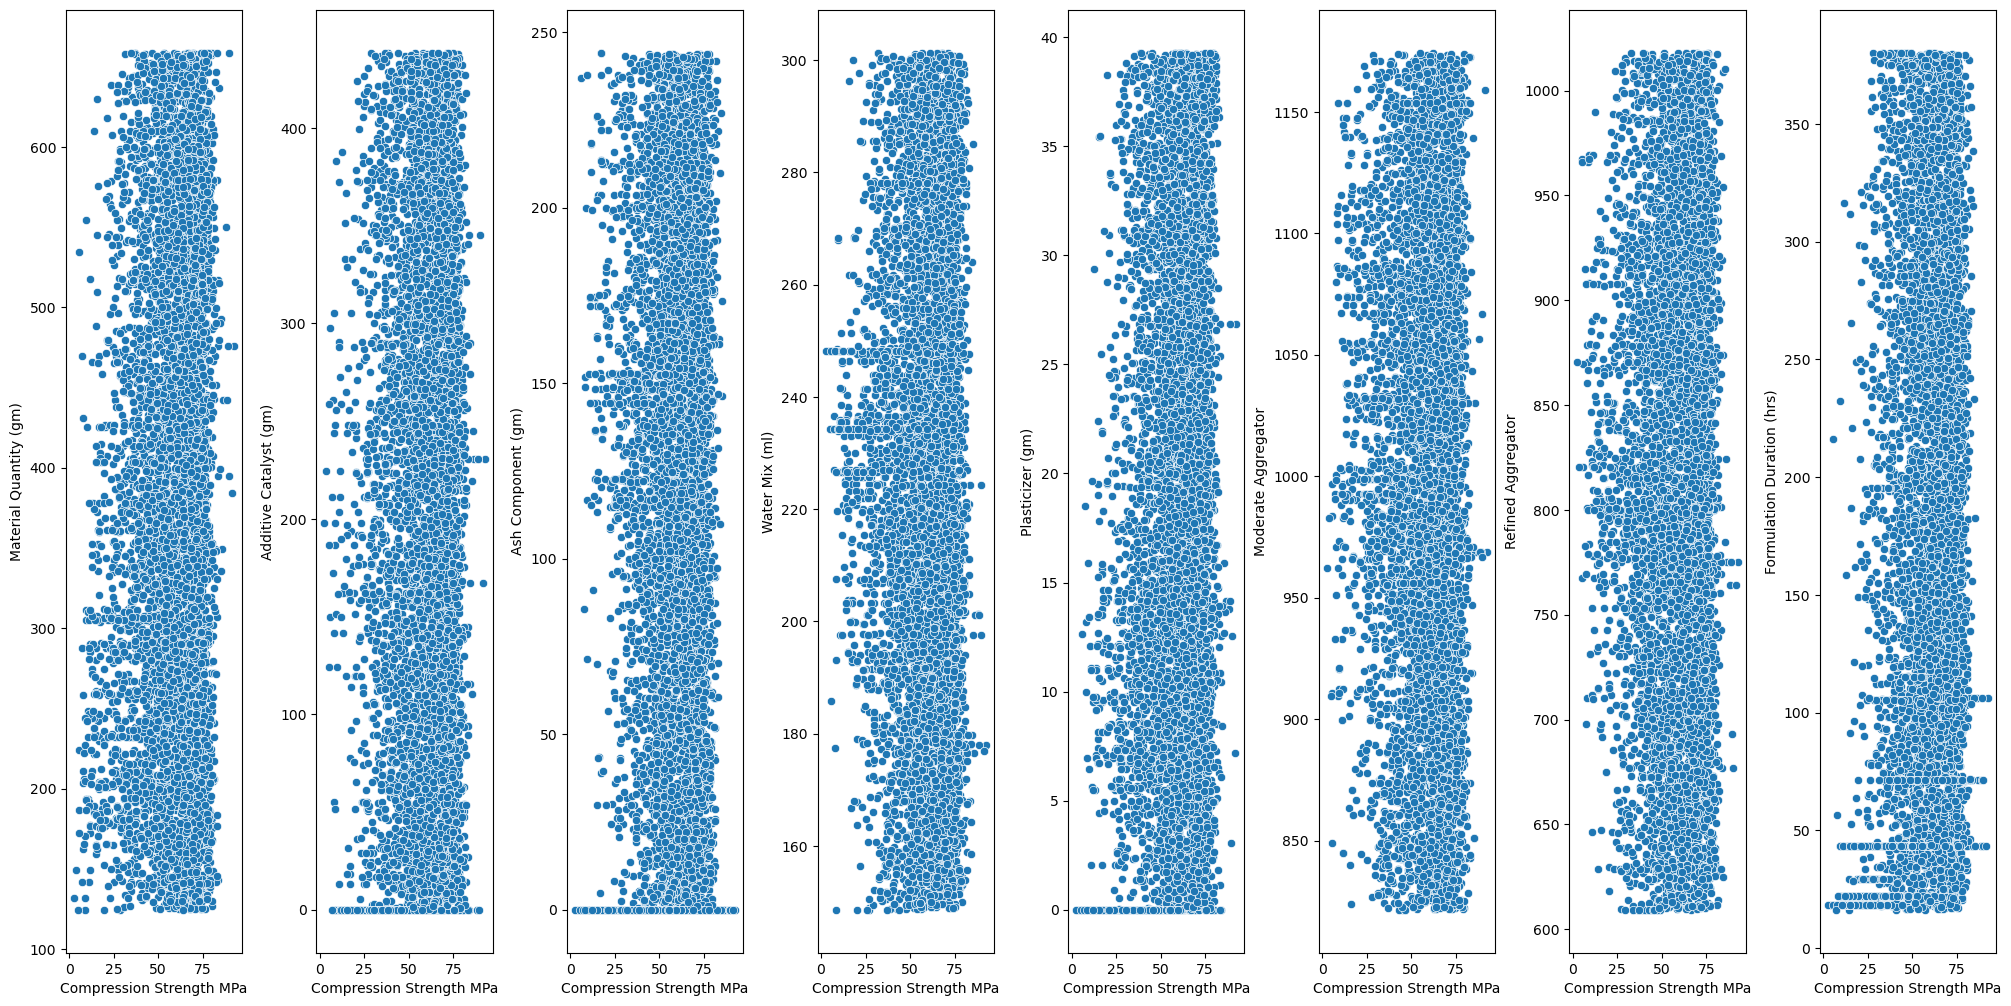

In [12]:
# data analsying
# Ploting scatter plot w.r.t Compression Strength MPa

fig, ax = plt.subplots(ncols=8, nrows=1, figsize=(20,10))
index = 0
ax = ax.flatten()

for col in df.columns:
    if col != "Compression Strength MPa":
        sns.scatterplot(x ="Compression Strength MPa", y= col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [13]:
# Checking the skewness
df.skew()

Material Quantity (gm)        0.101442
Additive Catalyst (gm)        0.105789
Ash Component (gm)           -0.005742
Water Mix (ml)                0.018010
Plasticizer (gm)              0.179846
Moderate Aggregator          -0.025214
Refined Aggregator           -0.005667
Formulation Duration (hrs)    0.225363
Compression Strength MPa     -0.768937
dtype: float64

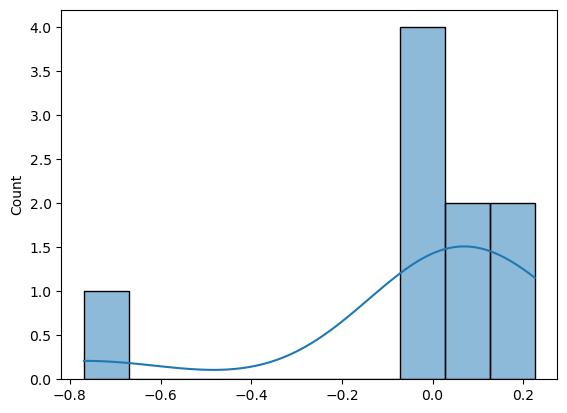

In [14]:
### Checking the Dataset Skewness 
sns.histplot(df.skew(), kde= True)
plt.show()

In [15]:
# dataset is negatively skew

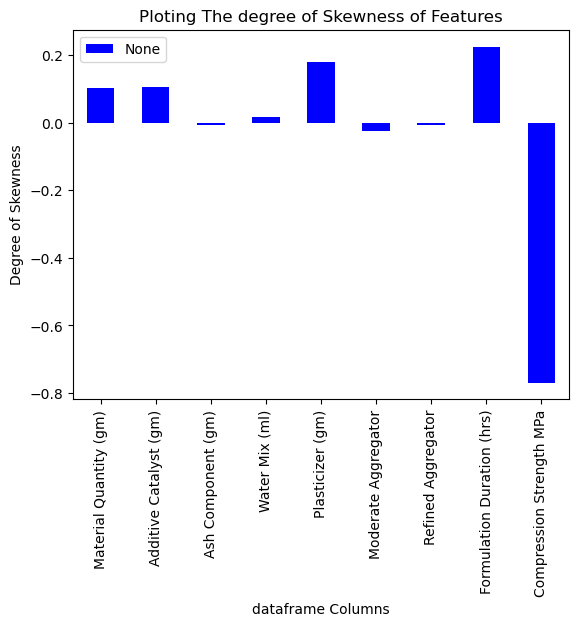

In [16]:
# Checking the skewness and ploting the bar graph

df.skew().plot(kind= "bar", color = "blue")
plt.xlabel("dataframe Columns")
plt.ylabel("Degree of Skewness")
plt.title("Ploting The degree of Skewness of Features")
plt.legend()
plt.show()

Material Quantity (gm)
0.1014163736033808


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


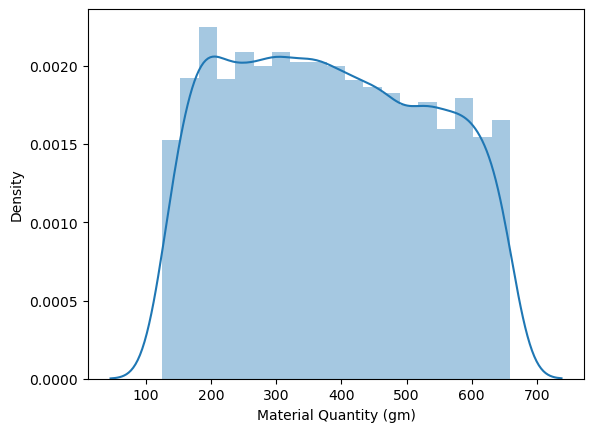

Additive Catalyst (gm)
0.10576254118441768


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


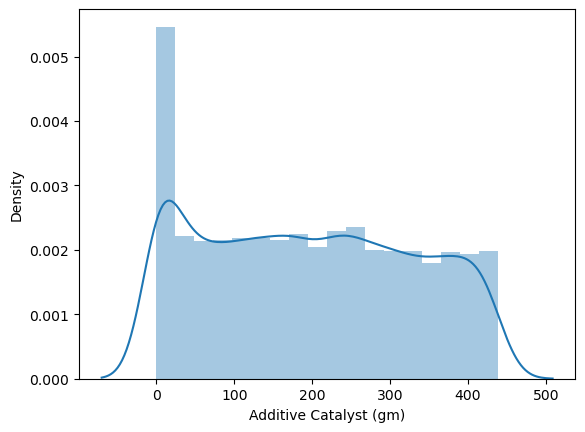

Ash Component (gm)
-0.005740594880969478


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


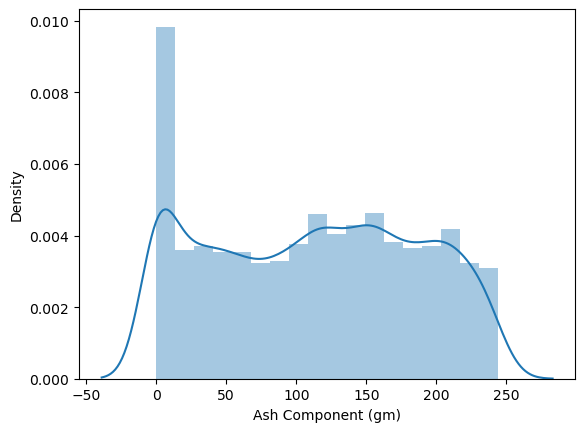

Water Mix (ml)
0.018005861454092807


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


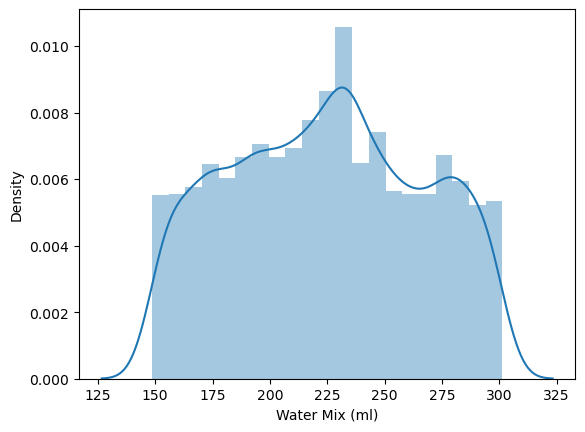

Plasticizer (gm)
0.17980084453674713


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


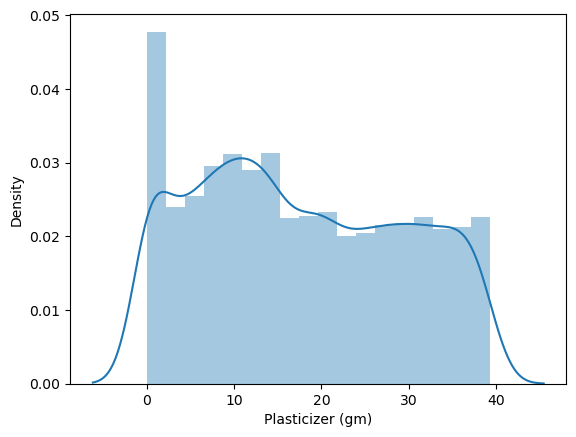

Moderate Aggregator
-0.025208072376660114


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


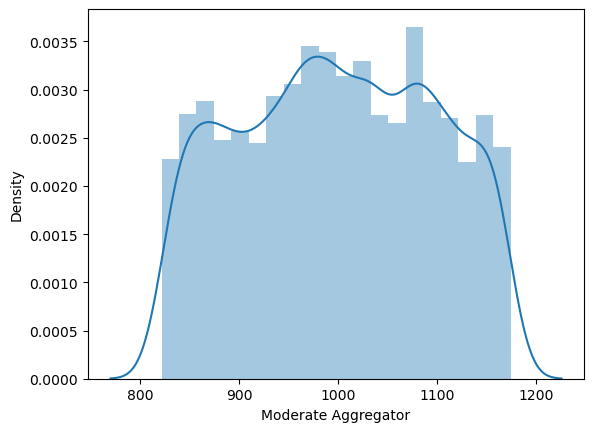

Refined Aggregator
-0.005665492447416753


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


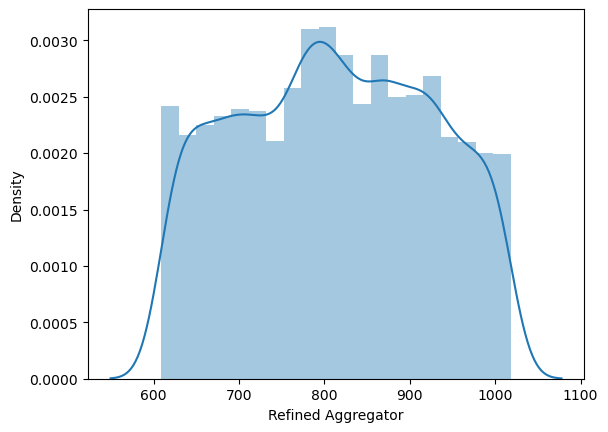

Formulation Duration (hrs)
0.2253069479419468


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


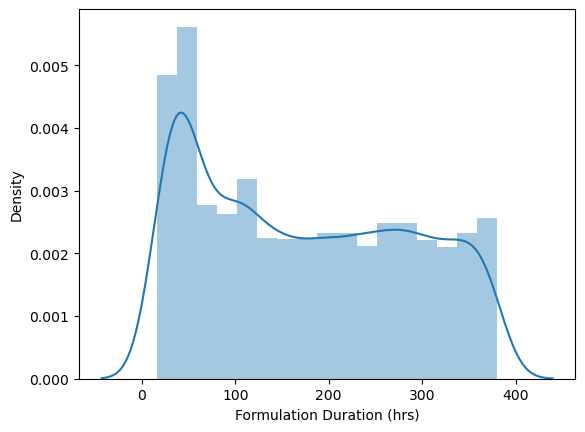

Compression Strength MPa
-0.7687449286414988


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


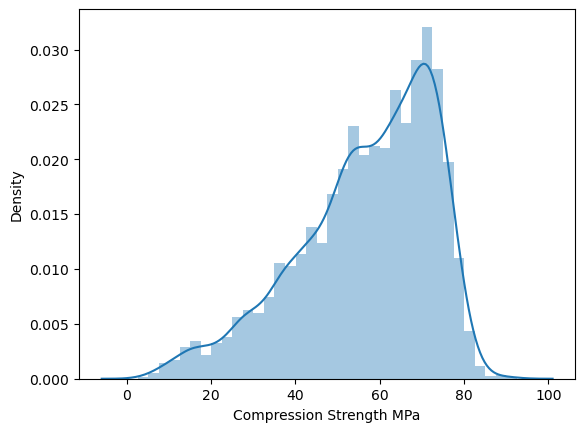

In [17]:
from scipy.stats import skew
for col in df.columns:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

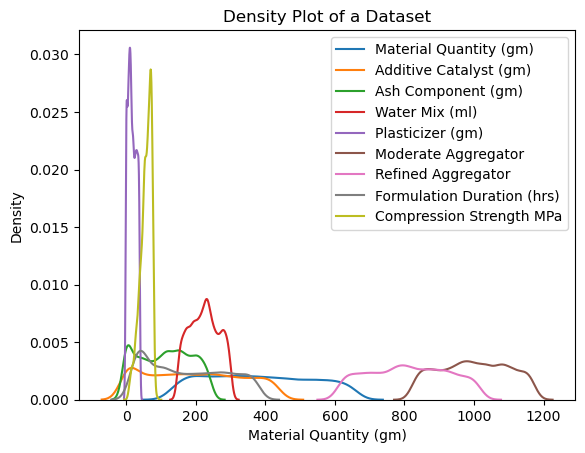

In [18]:
### Ploting the Dataset Distribution to check every density and 
for column in df.columns:
 sns.kdeplot(df[column], label=column)
plt.title("Density Plot of a Dataset")
plt.legend()
plt.show()

In [19]:
df.corr()

,Material Quantity (gm),Additive Catalyst (gm),Ash Component (gm),Water Mix (ml),Plasticizer (gm),Moderate Aggregator,Refined Aggregator,Formulation Duration (hrs),Compression Strength MPa
Material Quantity (gm),1.000000,0.009915,-0.020792,0.006496,0.048439,-0.007077,-0.017512,0.068994,0.130024
Additive Catalyst (gm),0.009915,1.000000,0.053135,0.029454,0.140341,-0.023353,0.010720,0.162147,0.180688
Ash Component (gm),-0.020792,0.053135,1.000000,-0.011093,0.161586,-0.007257,0.041248,0.103810,0.095207
Water Mix (ml),0.006496,0.029454,-0.011093,1.000000,-0.024860,-0.032200,-0.053895,0.028321,-0.025540
Plasticizer (gm),0.048439,0.140341,0.161586,-0.024860,1.000000,-0.019667,0.056319,0.156638,0.208116
Moderate Aggregator,-0.007077,-0.023353,-0.007257,-0.032200,-0.019667,1.000000,-0.004989,0.005475,-0.030569
Refined Aggregator,-0.017512,0.010720,0.041248,-0.053895,0.056319,-0.004989,1.000000,0.007182,-0.010496
Formulation Duration (hrs),0.068994,0.162147,0.103810,0.028321,0.156638,0.005475,0.007182,1.000000,0.271159
Compression Strength MPa,0.130024,0.180688,0.095207,-0.025540,0.208116,-0.030569,-0.010496,0.271159,1.000000


In [20]:
# Correaltion of Compression Strength MPa with other variable

df.corr()['Compression Strength MPa']

Material Quantity (gm)        0.130024
Additive Catalyst (gm)        0.180688
Ash Component (gm)            0.095207
Water Mix (ml)               -0.025540
Plasticizer (gm)              0.208116
Moderate Aggregator          -0.030569
Refined Aggregator           -0.010496
Formulation Duration (hrs)    0.271159
Compression Strength MPa      1.000000
Name: Compression Strength MPa, dtype: float64

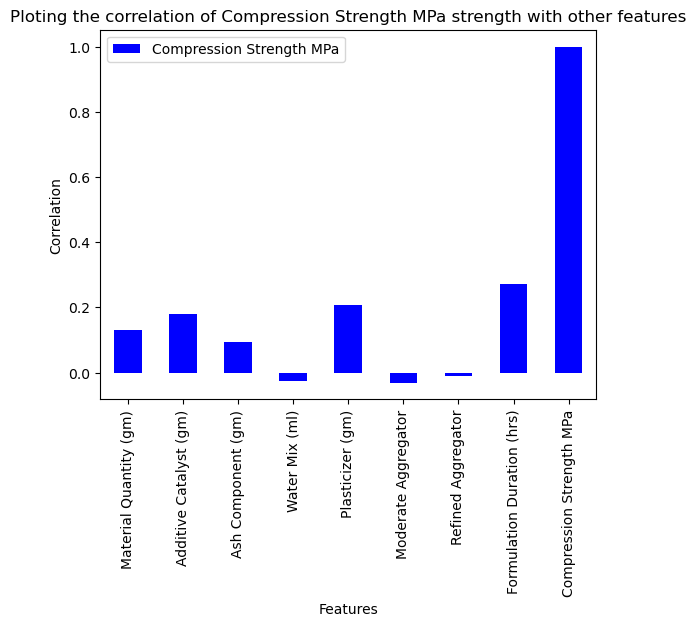

In [21]:
# Correaltion of concrete_compressive_strength with other variable and ploting a graph
df.corr()["Compression Strength MPa"].plot(kind ="bar", color ="blue")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.title("Ploting the correlation of Compression Strength MPa strength with other features")
plt.legend()
plt.show()

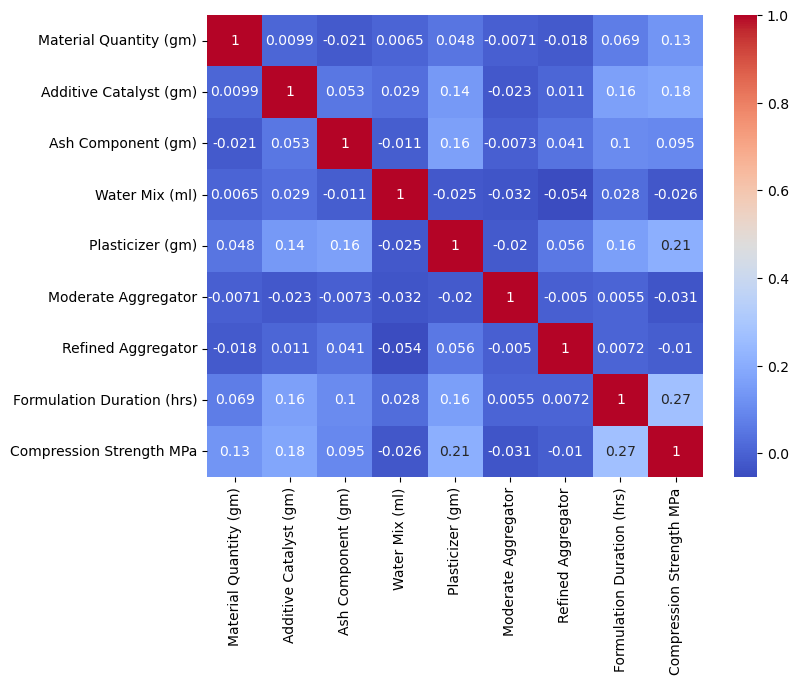

In [22]:
# heatmap of Correlation
# Correaltion of Compression Strength MPa with other variable and ploting a graph

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot = True,cmap="coolwarm")
plt.show()

# Obeservation

1. Formulation Duration (hrs) & Plasticizer (gm) having the high correlation with Compression Strength MPa
2. Water Mix (ml) , Moderate Aggregator , Refined Aggregator having negative correlation with Compression Strength MPa
3. Remaining having least correlation with Compression Strength MPa


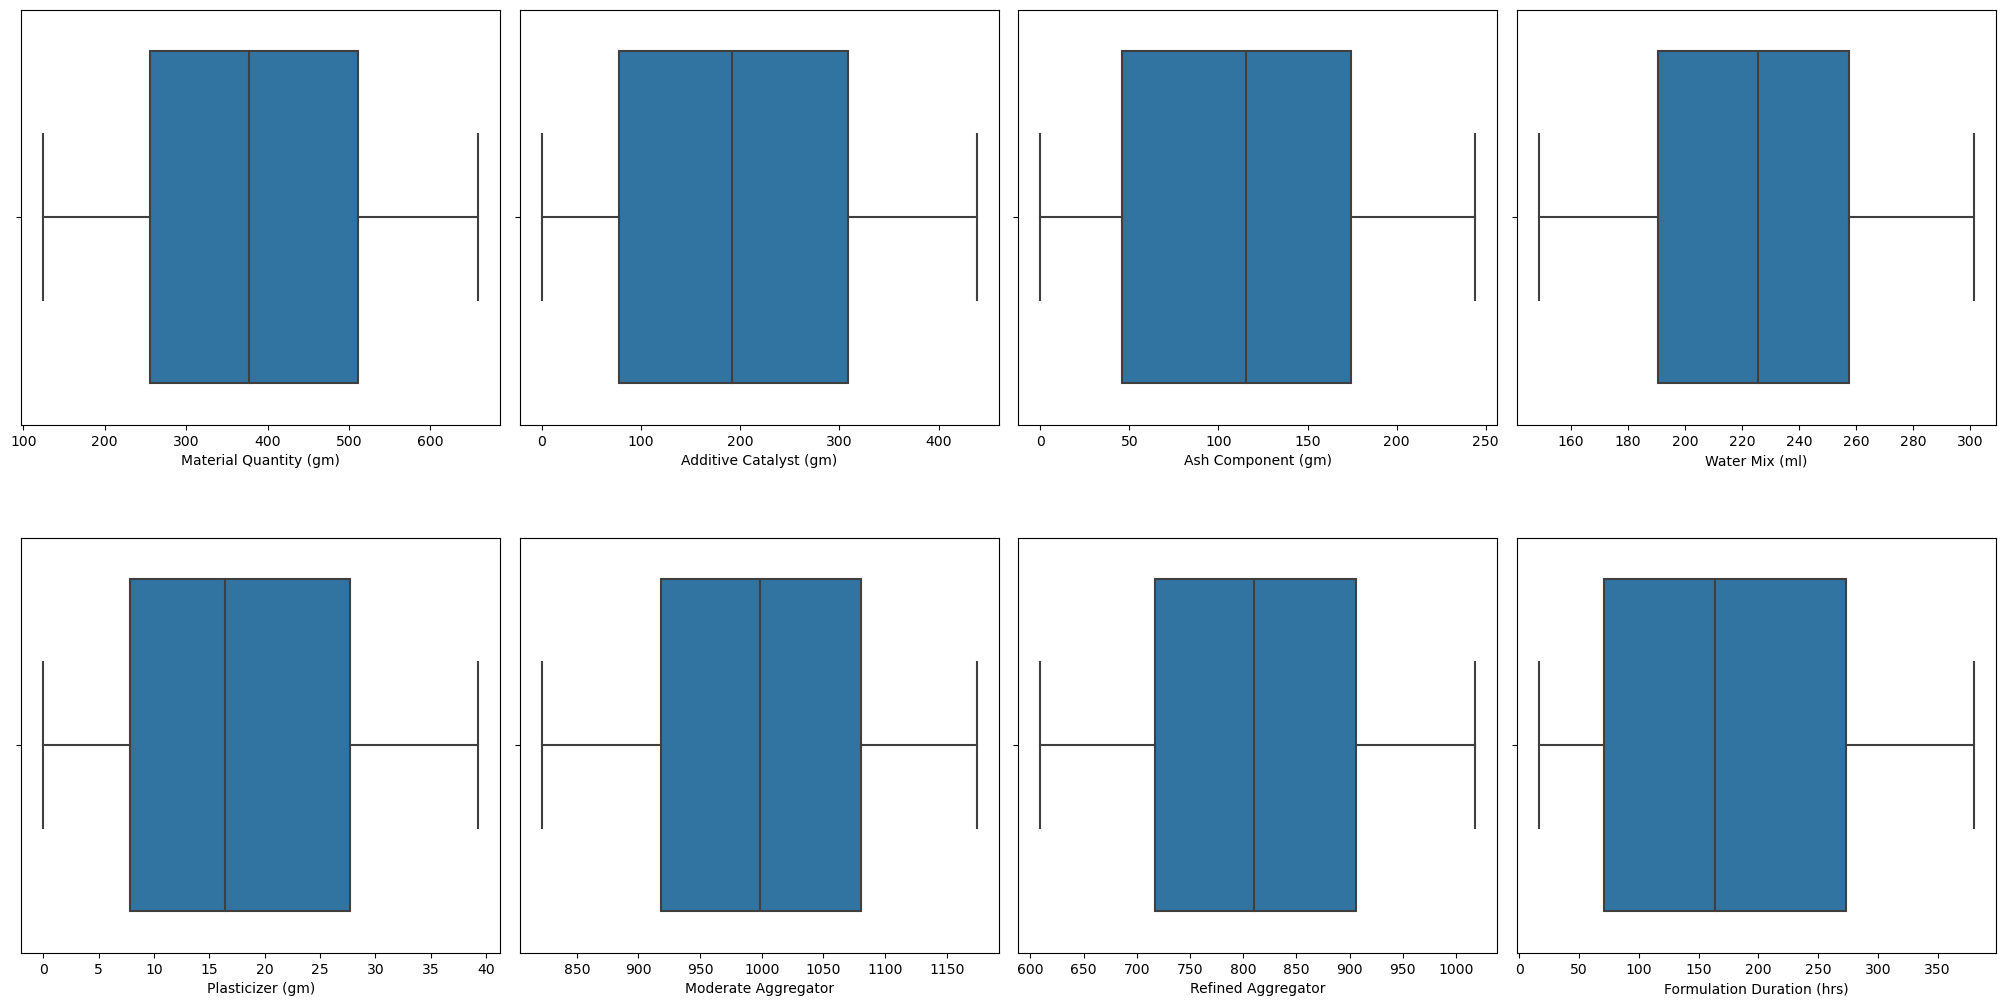

In [23]:
# Ckecking for outliers

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col in df.columns:
    if col != "Compression Strength MPa":
        sns.boxplot(x=col, data=df,ax=ax[index])
 
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [24]:
# Feature Engineering and selelction

continues_col = []
categorical_col = []

for col in df.columns:
    unique_values = df[col].nunique()
    if unique_values < 10:
        categorical_col.append(col)
    else:
        continues_col.append(col)
print(f"Number of continues features - {continues_col}") 
print(f"Number of categorical features - {categorical_col}")

Number of continues features - ['Material Quantity (gm)', 'Additive Catalyst (gm)', 'Ash Component (gm)', 'Water Mix (ml)', 'Plasticizer (gm)', 'Moderate Aggregator', 'Refined Aggregator', 'Formulation Duration (hrs)', 'Compression Strength MPa']
Number of categorical features - []


In [25]:
df.columns

Index(['Material Quantity (gm)', 'Additive Catalyst (gm)',
       'Ash Component (gm)', 'Water Mix (ml)', 'Plasticizer (gm)',
       'Moderate Aggregator', 'Refined Aggregator',
       'Formulation Duration (hrs)', 'Compression Strength MPa'],
      dtype='object')

In [26]:
# Multilinear

X = df[['Material Quantity (gm)', 'Additive Catalyst (gm)','Ash Component (gm)', 'Water Mix (ml)', 'Plasticizer (gm)',
       'Moderate Aggregator', 'Refined Aggregator','Formulation Duration (hrs)']].values
y = df['Compression Strength MPa'].values

from sklearn.preprocessing import StandardScaler, MinMaxScaler
PredictorScaler = MinMaxScaler()
PredictorScalerFit = PredictorScaler.fit(X)
X=PredictorScalerFit.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 350)

from sklearn import linear_model
regr1 = linear_model.LinearRegression()
regr1.fit(X_train,y_train)

y_hat = regr1.predict(X_test)
from sklearn.metrics import r2_score

r2_score(y_test,y_hat)


0.1529949262721384

In [27]:
# Xgboost

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 550)

from xgboost import XGBRegressor
regr2 = XGBRegressor()
regr2.fit(X_train,y_train)
y_hat1 = regr2.predict(X_test)

r2_score(y_test,y_hat1)

0.3325126226386753

In [28]:
# Dicision Tree
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X,y,test_size = 0.2, random_state = 250)

from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth = 4)
DT.fit(X_trainset, y_trainset)
y_hat3 = DT.predict(X_testset)
r2_score(y_testset,y_hat3)

0.29035544360979215

In [29]:
X1 = df[['Material Quantity (gm)', 'Additive Catalyst (gm)','Ash Component (gm)', 'Water Mix (ml)', 'Plasticizer (gm)',
       'Moderate Aggregator', 'Refined Aggregator','Formulation Duration (hrs)']].values
y1 = df['Compression Strength MPa'].values

from sklearn.preprocessing import StandardScaler, MinMaxScaler
PredictorScaler1 = MinMaxScaler()
PredictorScaler1Fit = PredictorScaler1.fit(X1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 450)


from sklearn.ensemble import RandomForestRegressor
regr3 = RandomForestRegressor(n_estimators = 375)
regr3.fit(X_train, y_train)
y_pred = regr3.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.4320977667731143

In [30]:
regr3.fit(X_train, y_train)

RandomForestRegressor(n_estimators=375)

In [31]:
import pickle
pickle.dump(regr3, open('model.pkl','wb'))